# 03.03 chebyshev

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [1]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  import numpy.polynomial as npp
  import scipy as sp
  from tabulate import tabulate


###### code, utility

In [2]:
def err_num(x,xs): # ~ horners
  rc = 1
  for xi in xs:
    rc = rc*(x-xi)
  return rc


###### code, images in order of appearance

In [37]:
def img_errors():

  # known
  xs = np.linspace(-1,1,9)
  ys = np.zeros_like(xs)

  # calc
  xs_even = np.linspace(-1,1,101)
  ps_even = err_num(xs_even,xs)

  # calc cheby
  n = len(xs)
  xs_rts = npp.chebyshev.chebpts2(n) # chebyshev roots
  ys_rts = ys.copy()
  ps_rts = err_num(xs_even,xs_rts)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(xs,ys,c="C0",marker="o",label="evenly spaced")
  plt.plot(xs_even,ps_even,c="C0",linestyle=":",label="error term, numerator")
  plt.scatter(xs_rts,ys_rts,c="C1",marker="o",label="chebyshev roots")
  plt.plot(xs_even,ps_rts,c="C1",linestyle=":",label="error term, numerator")

  # plot, style
  plt.grid()
  plt.title(f"polynomial interpolation error\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("why not")
  plt.xlabel("x")
  # plot, show
  plt.show()


In [22]:
def img_cheb_degrees():

  t0 = lambda x: 1 #lol
  t1 = lambda x: x
  t2 = lambda x: 2*pow(x,2) - 1
  t3 = lambda x: 4*pow(x,3) - 3*x
  t4 = lambda x: 2*x*t3(x) - t2(x)
  t5 = lambda x: 2*x*t4(x) - t3(x)

  xs = np.linspace(-1,1,101)
  ys_0 = [1]*101 # lol again
  ys_1 = t1(xs)
  ys_2 = t2(xs)
  ys_3 = t3(xs)
  ys_4 = t4(xs)
  ys_5 = t5(xs)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.plot(xs,ys_0,label="$T_0(x)$")
  plt.plot(xs,ys_1,label="$T_1(x)$")
  plt.plot(xs,ys_2,label="$T_2(x)$")
  plt.plot(xs,ys_3,label="$T_3(x)$")
  plt.plot(xs,ys_4,label="$T_4(x)$")
  plt.plot(xs,ys_5,label="$T_5(x)$")

  # plot, style
  plt.grid()
  plt.title(f"chebyshev polynomials\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("y")
  plt.xlabel("x")
  # plot, show
  plt.show()


In [23]:
def img_cheb_roots():

  # plot, cfg
  plt.close("all")
  fig,axs = plt.subplots(1,3)
  fig.suptitle('some chebyshev roots\n')
  fig.set_figwidth(10)
  fig.set_figheight(2.5)

  # plot, data
  ns = [5,15,25]
  for i,n in enumerate(ns):
    xs = np.linspace(-1,1,101)
    ys = np.sqrt(1-pow(xs,2))
    axs[i].plot(xs,ys,linestyle="-",label="circle")

    xs = np.zeros(n)
    ys = np.zeros(n)
    s_color = "C0"
    for k in range(n):
      θ = np.pi*(2*k+1)/(2*n)
      xs[k] = np.cos(θ)
      ys[k] = np.sin(θ)
      axs[i].plot([xs[k],xs[k]],[0,ys[k]],c=s_color)
    axs[i].scatter(xs,ys,c=s_color,label=str(n))
    axs[i].scatter(xs,[0]*n,c=s_color)
    axs[i].set_xlim(-1.1,1.1)
    axs[i].set_ylim(-0.1,1.1)
    axs[i].axis("equal")

  # plot, display
  plt.show()


###### code, examples

In [33]:
def eg_11():

  # known
  x = [0,np.pi/2] # interval
  n = 4 # roots
  err_bound = 0.00198

  # evenly spaced
  xs_esp = np.linspace(x[0],x[1],n)
  ys_esp = np.sin(xs_esp)
  px_esp = sp.interpolate.lagrange(xs_esp,ys_esp)
  print(f"\npolynomial sine, degree {n-1}:\n\n{px_esp}\n") # meh print
  ps_esp = np.polyval(px_esp,xs_esp)

  # chebyshev roots
  xs_rts = np.zeros((n))
  for i in range(n):
    xs_rts[i] = (x[1]+x[0])/2 + (x[1]-x[0])/2*np.cos(np.pi*(2*i+1)/(2*n))
  ys_rts = np.sin(xs_rts)
  px_rts = sp.interpolate.lagrange(xs_rts,ys_rts)
  print(f"\npolynomial sine, degree {n-1} with chebyshev roots:\n\n{px_rts}\n") # meh print
  ps_rts = np.polyval(px_rts,xs_rts)

  # calc
  xs_moar = np.linspace(-np.pi*3/4,np.pi*3/4,1000) # 3*8+1)
  ps_moar_rts = np.polyval(px_rts,xs_moar)
  ys_moar = np.sin(xs_moar)
  ps_moar_esp = np.polyval(px_esp,xs_moar)

  # plot, cfg
  plt.close("all")
  fig,axs = plt.subplots(1,2)
  fig.suptitle("\nchebyshev stuff\n\n\n")
  fig.tight_layout(pad=1)
  fig.set_figwidth(10)
  fig.set_figheight(3)

  # plot, data
  axs[0].title.set_text("roots comparison")
  axs[0].scatter(xs_rts,ys_rts,c="C0",marker="o",label="chebyshev roots")
  axs[0].plot(xs_moar,ys_moar,c="C0",linestyle=":",label="np.sin()")
  axs[0].scatter(xs_rts,ps_rts,c="C1",marker="*")
  axs[0].plot(xs_moar,ps_moar_rts,c="C1",linestyle=":",label="$P_{che}$, not scaled")
  axs[0].scatter(xs_esp,ps_esp,c="C2",marker=".")
  axs[0].plot(xs_moar,ps_moar_esp,c="C2",linestyle=":",label="$P_{esp}$, not scaled")
  axs[0].set_xlim(-1,2)
  axs[0].legend(bbox_to_anchor=(-0.12,1),loc="upper right",borderaxespad=0)

  axs[1].title.set_text(f"error, $n={n}$")
  axs[1].plot([xs_esp[0],xs_esp[-1]],[err_bound]*2,c="C0",linestyle="-",label="error bound for interval [0,π/2]")
  axs[1].plot([xs_esp[0],xs_esp[-1]],[-err_bound]*2,c="C0",linestyle="-")
  axs[1].plot([xs_esp[0],xs_esp[0]],[-err_bound,err_bound],c="C0",linestyle=":")
  axs[1].plot([xs_esp[-1],xs_esp[-1]],[-err_bound,err_bound],c="C0",linestyle=":")
  axs[1].scatter(xs_rts,ys_rts-ps_rts,c="C1",marker="*")
  axs[1].plot(xs_moar,ys_moar-ps_moar_rts,c="C1",linestyle=":",label="error, cheby")
  axs[1].scatter(xs_esp,ys_esp-ps_esp,c="C2",marker=".")
  axs[1].plot(xs_moar,ys_moar-ps_moar_esp,c="C2",linestyle=":",label="error, even")
  axs[1].set_xlim(-0.1,1.7)
  axs[1].set_ylim(-err_bound*1.1,err_bound*1.1)
  axs[1].legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)

  # plot, style
  plt.grid()
  # plot, show
  plt.show()

  # error, sample
  xs_sam = np.array([1.,2.,3.,4.,14.,1000.])
  ys_sam = np.sin(xs_sam)

  # error, scale input to area of niceness
  xs_mod = xs_sam.copy()
  ps_sam = np.zeros_like(ys_sam)
  for i,x in enumerate(xs_mod):
    s = 1.
    x = x%(2*np.pi)
    if x > np.pi:
      x = 2*np.pi - x
      s = -1.
    if x > np.pi/2:
      x = np.pi - x
    xs_mod[i] = x
    ps_sam[i] = s*np.polyval(px_rts,x)

  # error, display
  data = []
  for i,x in enumerate(xs_sam):
    data.append([x,ys_sam[i],ps_sam[i],abs(ys_sam[i] - ps_sam[i])])

  print() #spacer
  print(tabulate(data,headers=["x (rad)","np.sin()","P,che","error"],tablefmt="github"),"\n")


In [34]:
def eg_12():

  # known
  x = [0,np.pi/2] # interval
  n = 10 # roots
  err_bound = 1.224e-09

  # evenly spaced
  xs_esp = np.linspace(x[0],x[1],n)
  ys_esp = np.sin(xs_esp)
  px_esp = sp.interpolate.lagrange(xs_esp,ys_esp)
  print(f"\npolynomial sine, degree {n-1}:\n\n{px_esp}\n") # meh print
  ps_esp = np.polyval(px_esp,xs_esp)

  # chebyshev roots
  xs_rts = np.zeros((n))
  for i in range(n):
    xs_rts[i] = (x[1]+x[0])/2 + (x[1]-x[0])/2*np.cos(np.pi*(2*i+1)/(2*n))
  ys_rts = np.sin(xs_rts)
  px_rts = sp.interpolate.lagrange(xs_rts,ys_rts)
  print(f"\npolynomial sine, degree {n-1} with chebyshev roots:\n\n{px_rts}\n") # meh print
  ps_rts = np.polyval(px_rts,xs_rts)

  # calc
  xs_moar = np.linspace(-np.pi*3/4,np.pi*3/4,1000) # 3*8+1)
  ps_moar_rts = np.polyval(px_rts,xs_moar)
  ys_moar = np.sin(xs_moar)
  ps_moar_esp = np.polyval(px_esp,xs_moar)

  # plot, cfg
  plt.close("all")
  fig,axs = plt.subplots(1,2)
  fig.suptitle("\nchebyshev stuff\n\n\n")
  fig.tight_layout(pad=1)
  fig.set_figwidth(10)
  fig.set_figheight(3)

  # plot, data
  axs[0].title.set_text("roots comparison")
  axs[0].scatter(xs_rts,ys_rts,c="C0",marker="o",label="chebyshev roots")
  axs[0].plot(xs_moar,ys_moar,c="C0",linestyle=":",label="np.sin()")
  axs[0].scatter(xs_rts,ps_rts,c="C1",marker="*")
  axs[0].plot(xs_moar,ps_moar_rts,c="C1",linestyle=":",label="$P_{che}$, not scaled")
  axs[0].scatter(xs_esp,ps_esp,c="C2",marker=".")
  axs[0].plot(xs_moar,ps_moar_esp,c="C2",linestyle=":",label="$P_{esp}$, not scaled")
  axs[0].set_xlim(-1,2)
  axs[0].legend(bbox_to_anchor=(-0.12,1),loc="upper right",borderaxespad=0)

  axs[1].title.set_text(f"error, $n={n}$")
  axs[1].plot([xs_esp[0],xs_esp[-1]],[err_bound]*2,c="C0",linestyle="-",label="error bound for interval [0,π/2]")
  axs[1].plot([xs_esp[0],xs_esp[-1]],[-err_bound]*2,c="C0",linestyle="-")
  axs[1].plot([xs_esp[0],xs_esp[0]],[-err_bound,err_bound],c="C0",linestyle=":")
  axs[1].plot([xs_esp[-1],xs_esp[-1]],[-err_bound,err_bound],c="C0",linestyle=":")
  axs[1].scatter(xs_rts,ys_rts-ps_rts,c="C1",marker="*")
  axs[1].plot(xs_moar,ys_moar-ps_moar_rts,c="C1",linestyle=":",label="error, cheby")
  axs[1].scatter(xs_esp,ys_esp-ps_esp,c="C2",marker=".")
  axs[1].plot(xs_moar,ys_moar-ps_moar_esp,c="C2",linestyle=":",label="error, even")
  axs[1].set_xlim(-0.1,1.7)
  axs[1].set_ylim(-err_bound*1.1,err_bound*1.1)
  axs[1].legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)

  # plot, style
  plt.grid()
  # plot, show
  plt.show()

  # error, sample
  xs_sam = np.array([1.,2.,3.,4.,14.,1000.])
  ys_sam = np.sin(xs_sam)

  # error, scale input to area of niceness
  xs_mod = xs_sam.copy()
  ps_sam = np.zeros_like(ys_sam)
  for i,x in enumerate(xs_mod):
    s = 1.
    x = x%(2*np.pi)
    if x > np.pi:
      x = 2*np.pi - x
      s = -1.
    if x > np.pi/2:
      x = np.pi - x
    xs_mod[i] = x
    ps_sam[i] = s*np.polyval(px_rts,x)

  # error, display
  data = []
  for i,x in enumerate(xs_sam):
    data.append([x,ys_sam[i],ps_sam[i],abs(ys_sam[i] - ps_sam[i])])

  print() #spacer
  print(tabulate(data,headers=["x (rad)","np.sin()","P,che","error"],tablefmt="github"),"\n")


## 0 runge effect

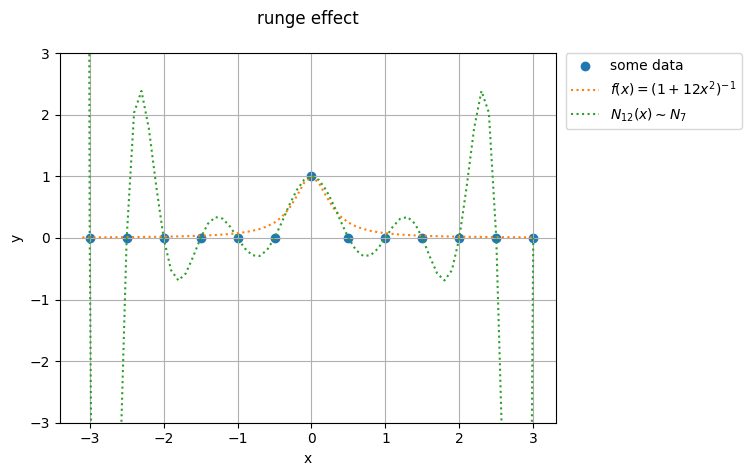

so that green line is the degree $n-1$ interpolating polynomial. useful, isnt it?
</br>


## 1 chebyshevs theorem


lagrange is simple, newtons divided difference is simpler in implementation and chebyshev is an implementation designed to improve control of the interpolation error.

$$\frac{(x-x_1)(x-x_2)\dots(x-x_n)}{n!}f^{(n)}(c)$$

on the interpolation interval. thats not everything but its a start.

consider interval $[-1,1]$. note that numerator is degree $n$ polynomial with maximum on that interval. is there particular $x_1,\dots,x_n$ to cause the maximum error to be as small as possible? this is the minimax problem of interpolation.

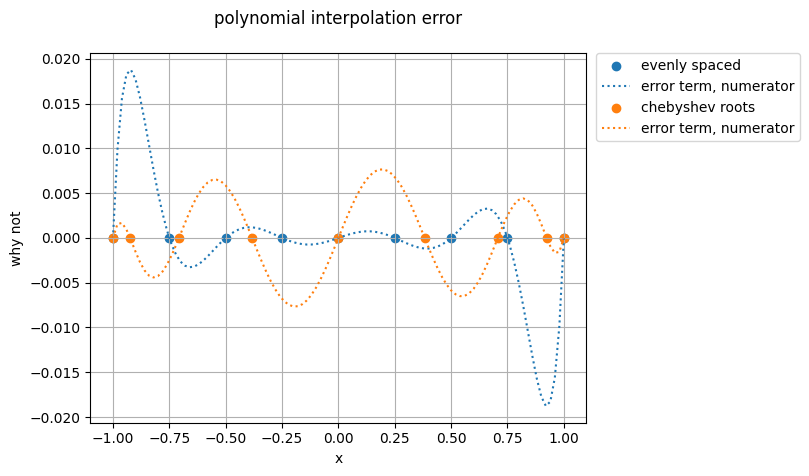

In [38]:
img_errors()

##### <b><font color=grey>theorem 06</font></b> <b>chebyshev interpolation</b>

the choice of $x_i\in [-1,1]$ that makes the value of

$$\text{max}_{\text{ }x\in[-1,1]} | (x-x_1)\dots(x-x_n)|$$

as small as possible is

$$x_i = cos\frac{(2i-1)\pi}{2n} \quad i=1,\dots,n,$$

and its minimum is $\frac{1}{2^{n-1}}$. so the minimum is achieved by

$$(x-x_1)\dots(x-x_n) = \frac{1}{2^{n-1}}T_n(x),$$

where $T_n(x)$ denotes degree $n$ chebyshev polynomial.

ie, interpolation error can be minimized if the $n$ interpolation base points in $[−1, 1]$ are chosen to be the roots of the degree $n$ chebyshev interpolating polynomial $T_n(x)$. these roots are

$$x_i = cos \frac{\text{odd }\pi}{2n}$$

where "odd" stands for the odd numbers from $1$ to $2n − 1$. that guarantees the absolute value of the error term numerator is less than $\frac{1}{2n-1}$ for all $x\in[-1,1]$.

choosing the chebyshev roots as the base points for interpolation distributes the interpolation error as evenly as possible across the interval $[−1, 1]$. the interpolating polynomial that uses chebyshev roots as base points is the <b>chebyshev interpolating polynomial</b>.

##### example 10

find worst-case error bound for the difference on $[-1,1]$ between $f(x)=e^x$ and degree four chebyshev interpolating polynomial.

$$
\text{error } \epsilon(x) = f(x)-P_4(x) = \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)(x-x_5)}{5!}f^{(5)}(c),
$$

where

$$x_1 = cos\frac{\pi}{10}, x_2 = cos\frac{3\pi}{10}, x_3 = cos\frac{5\pi}{10},x_4 = cos\frac{7\pi}{10},x_1 = cos\frac{9\pi}{10}$$

are the chebyshev roots and where $-1\le c\le 1$. by theorem 05, for $-1\le x\le 1$,

$$|(x-x_1)\dots(x-x_5)| \le \frac{1}{2^4}.$$

also $|f^{(5)}|\le e^1$ on $[-1,1]$ and interpolation error is

$$|e^x-P_4(x)| \le \frac{e}{2^4\cdot 5!} \approx 0.00142 \quad \forall x\in[-1,1].$$

programmatically, chebyshev has slightly worse error in the middle and much better error at the end points.

## 2 chebyshev polynomials

define the $n$th <b>chebyshev polynomial</b> by $T_n(x) = cos(n\;arcos\;x)$. work through the trig, and itll look more conventional.

\begin{align}
  n=0 \quad\mapsto\quad T_0(x) &= cos(0\cdot arcos\,x) = 1 \\
  n=1 \quad\mapsto\quad T_1(x) &= cos(1\cdot arcos\,x) = x \\
  n=2 \quad\mapsto\quad T_2(x) &= cos(2\cdot arcos\,x) = cos^2y, \quad\text{where }y = arcos\,x \\
  &= cos^2y - sin^2y - 1 \\
  &= 2x^2 - 1 \quad\sim\text{ degree }2\text{ polynomial. } \checkmark
\end{align}

in general,

\begin{align}
  T_{n+1}(x) &= cos(n+1)y = cos(ny+y) = cos\,ny\,cos\,y - sin\,ny\,sin\,y \\
  T_{n-1}(x) &= cos(n-1)y = cos(ny-y) = cos\,ny\,cos\,y - sin\,ny\,sin\,(-y) \\ \\
  &\Downarrow \quad sin(-y) = -sin\,y \\ \\
  T_{n+1}(x) + T_{n-1}(x) &= 2\,cos\,ny\,cos\,y \\ \\
  &\Downarrow \quad y = arcos\,x \\ \\
  &= 2\cdot T_n(x)\cdot x =  2xT_n(x) \\ \\
  &\Downarrow \\ \\
  T_{n+1}(x) &= 2xT_n(x) - T_{n-1}(x).
\end{align}

this is the <b>recursion relation</b> for chebyshev polynomials.

##### <b><font color=grey>fact 01</font></b>

$T_n$s are polynomials. this was shown explicitly for

\begin{align}
  T_0 &= 1 \\
  T_1 &= x \\
  T_2 &= 2x \cdot T_1(x) - T_0(x) =  2x^2 - 1 \\
  T_3 &= 2x \cdot T_2(x) - T_1(x) = 2x(2x^2-1) - x = 4x^3-3x
\end{align}

##### <b><font color=grey>fact 02</font></b>

deg($T_n$) = $n$ and leading coefficient is $2^{n-1}$. this is clear for $n=1,n=2$ and by recursion relation to all $n$.

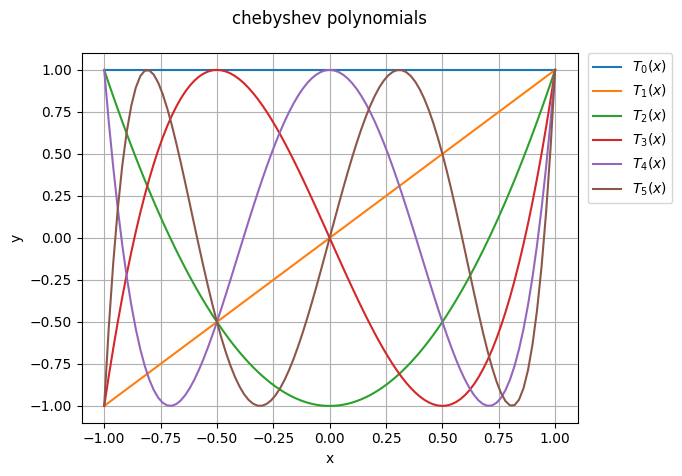

In [28]:
img_cheb_degrees()

##### <b><font color=grey>fact 03</font></b>

$T_n(1) = 1, T_n(-1) = (-1)^n$. clear for $n=1,2$ and in general,

\begin{align}
  T_{n+1}(1) &= 2(1)T_n(1) - T_{n-1}(1) = 2(1) - 1 = 1 \text{ and} \\ \\
  T_{n+1}(-1) &= 2(-1)T_n(-1) - T_{n-1}(-1) \\
  &= -2(-1) - (-1)^{n-1} \\
  &= (-1)^{n-1}(2-1) = (-1)^{n-1} = (-1)^{n+1}.
\end{align}

##### <b><font color=grey>fact 04</font></b>

maximum absolute value of $T_n(x)$ for $-1\le x\le 1$ is $1$. bc $T_n(x) = cos\,y$ for some $y$.

##### <b><font color=grey>fact 05</font></b>

all zeros of $T_n(x)$ are located between $-1$ and $1$. the zeros are solutions of $0 = cos(n\text{ }arcos\text{ }x)$. bc $cos\text{ }y = 0$ iif $y =$ odd integer $\cdot (\frac{\pi}{2})$,

\begin{align}
  n\,arcos\,x &= \text{odd}\, \frac{\pi}{2} \\
  x &= cos \frac{\text{odd}\, \pi}{2n}.
\end{align}

###### visual, chebyshev root spacing


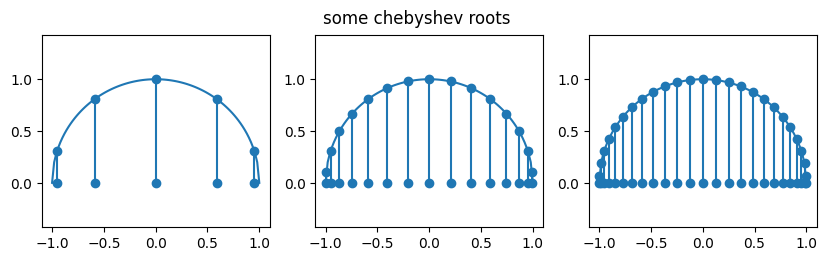

In [29]:
img_cheb_roots()

##### <b><font color=grey>fact 06</font></b>

$T_n(x)$ alternates between $-1$ and $1$ a total of $n+1$ times. this happens at $cos\,0, cos\frac{\pi}{n},\dots,cos(n-1)\frac{\pi}{n},cos\,\pi$.

##### usw

$\frac{T_n(x)}{2^{n-1}}$ is [monic](https://en.wikipedia.org/wiki/Monic_polynomial) from fact 02. all roots of $T_n(x)$ are real from fact 05. so $\frac{T_n(x)}{2^{n-1}}$ in factored form is $(x-x_1)\dots(x-x_n)$ where $x_i$ are chebyshev nodes as described in theorem 08.

##### proof of theorem 06

let $P_n(x)$ be a monic polynomial with an even smaller absolute maximum on $[−1,1]$; ie, $|P_n(x)| < \frac{1}{2^{n−1}}$ for $-1\le x\le 1$. this assumption leads to a contradiction. bc $T_n(x)$ alternates between $-1$ and $1$ a total of $n+1$ times (fact 06), at these $n+1$ points the difference $P_n - T_n/2^{n−1}$ is alternately positive and negative. therefore, $P_n - T_n/2^{n−1}$ must cross zero at least $n$ times; ie, it must have at least $n$ roots. this contradicts the fact that, bc $P_n,T_n/2^{n−1}$ are monic, their difference is of degree $\le n - 1$. $\blacksquare$

## 3. change of interval

so far our discussion of chebyshev interpolation has been restricted to the interval $[−1,1]$, because theorem 06 is most easily stated for this interval. next, scale to general interval $[a,b]$.

the base points are moved so that they have the same relative positions in $[a,b]$ that they had in $[−1,1]$. (1) stretch the points by the factor $(b−a)/2$; (2) translate the points by $(b+a)/2$ to move the center of mass from $0$ to the midpoint of $[a,b]$. ie,

$$cos\frac{\text{odd }\pi}{2n} \quad\mapsto\quad \frac{b-a}{2}cos\frac{\text{odd }\pi}{2n} + \frac{b+a}{2}.$$

this also changes the numerator of the interpolation error term bc its upper bound will stretch by $\frac{b-a}{2}$ on each factor $x-x_i$. so replace the minimax value

$$\frac{1}{2^{n-1}} \quad\mapsto\quad \frac{(\frac{b-a}{2})^n}{2^{n-1}}.$$

<b>chebyshev interpolation nodes</b>

on interval $[a,b]$,

$$x_i = \frac{b+a}{2} + \frac{b-a}{2} cos \frac{(2i - 1)\pi}{2n}$$

for $i = 1,\dots,n$. the inequality

$$|(x-x_1)\dots(x-x_n)| \le \frac{(\frac{b-a}{2})^n}{2^{n-1}}$$

holds on $[a,b]$.

##### example 11

continues example 07, which used evenly spaced points.

find the four chebyshev base points for interpolation on the interval $[0,\frac{\pi}{2}]$ and find an upper bound for chebyshev interpolation error for $f(x) = sin\text{ }x$ on the interval.

the chebyshev base points are

\begin{align}
  &\frac{\frac{\pi}{2}-0}{2} \, cos \left( \frac{\text{odd }\pi}{2(4)} \right) + \frac{\frac{\pi}{2}+0}{2}. \\ \\
  &\quad\Downarrow \\ \\
  x_1 &= \frac{\pi}{4} + \frac{\pi}{4} \,cos\frac{\pi}{8}, \\
  x_2 &= \frac{\pi}{4} + \frac{\pi}{4} \,cos\frac{3\pi}{8}, \\
  x_3 &= \frac{\pi}{4} + \frac{\pi}{4} \,cos\frac{5\pi}{8}, \\
  x_4 &= \frac{\pi}{4} + \frac{\pi}{4} \,cos\frac{7\pi}{8}.
\end{align}

the worst-case interpolation error for $0\le x\le \frac{\pi}{2}$ is

$$|sin\text{ }x - P_3(x)| = \frac{|(x-x_1)(x-x_2)(x-x_3)(x-x_4)|}{4!} \text{ } |f''''(c)| \le \frac{ \left ( \frac{\frac{\pi}{2}-0}{2} \right)^4 }{4!2^3} \cdot 1 \approx 0.00198$$


polynomial sine, degree 3:

         3           2
-0.1139 x - 0.06547 x + 1.02 x


polynomial sine, degree 3 with chebyshev roots:

         3           2
-0.1143 x - 0.06648 x + 1.023 x - 0.001131



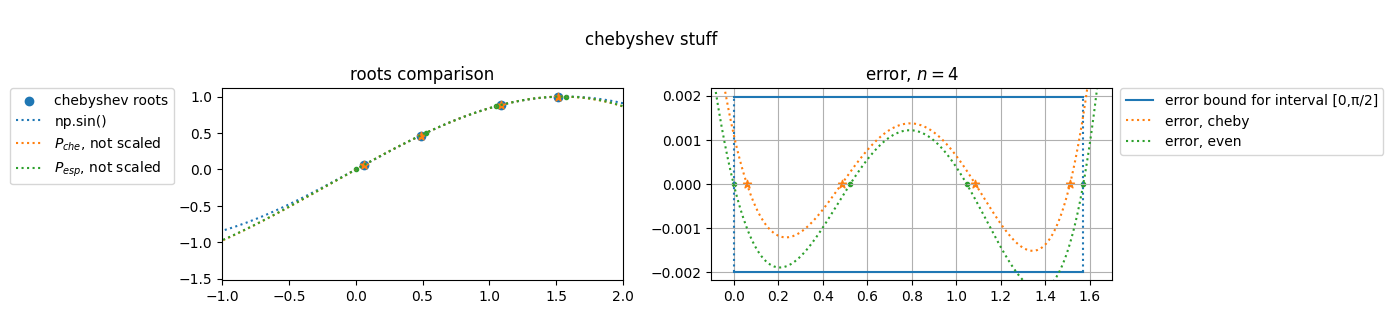


|   x (rad) |   np.sin() |     P,che |       error |
|-----------|------------|-----------|-------------|
|         1 |   0.841471 |  0.840831 | 0.000639605 |
|         2 |   0.909297 |  0.909747 | 0.000449781 |
|         3 |   0.14112  |  0.142019 | 0.000899202 |
|         4 |  -0.756802 | -0.755505 | 0.00129727  |
|        14 |   0.990607 |  0.991736 | 0.00112865  |
|      1000 |   0.82688  |  0.826072 | 0.000807298 | 



In [35]:
eg_11()

##### example 12

continues example 07. design a sine key that will give output correct to ten decimal places.

with error bound $1e-10$, calculate number of base points $n$ required.

\begin{align}
  |sin\,x - P_{n-1}(x)| &= \frac{|(x-x_1)\dots(x-x_n)|}{n!} \,|f^{(n)}(c)| \\ \\
  &\le \frac{ \left ( \frac{\frac{\pi}{2}-0}{2} \right)^n }{n!2^{n-1}} \cdot 1
\end{align}

eventually this coughs up error bound $\approx 1.224e-9$ for $n=9$ and error bound $\approx 4.807e-10$ for $n=10$. with $n=10$, the chebyshev base points on $[0,\frac{\pi}{2}]$ are $\frac{\pi}{4} + (\frac{\pi}{4})
\,cos(\frac{\text{odd }\pi}{20})$.


polynomial sine, degree 9:

           9             8             7             6            5
1.926e-06 x + 3.677e-06 x - 0.0002062 x + 9.592e-06 x + 0.008326 x
              4          3             2
 + 3.534e-06 x - 0.1667 x + 1.566e-07 x + 1 x


polynomial sine, degree 9 with chebyshev roots:

           9             8             7             6            5
1.921e-06 x + 3.657e-06 x - 0.0002059 x + 8.877e-06 x + 0.008327 x
              4          3            2
 + 2.725e-06 x - 0.1667 x + 8.26e-08 x + 1 x + 3.104e-11



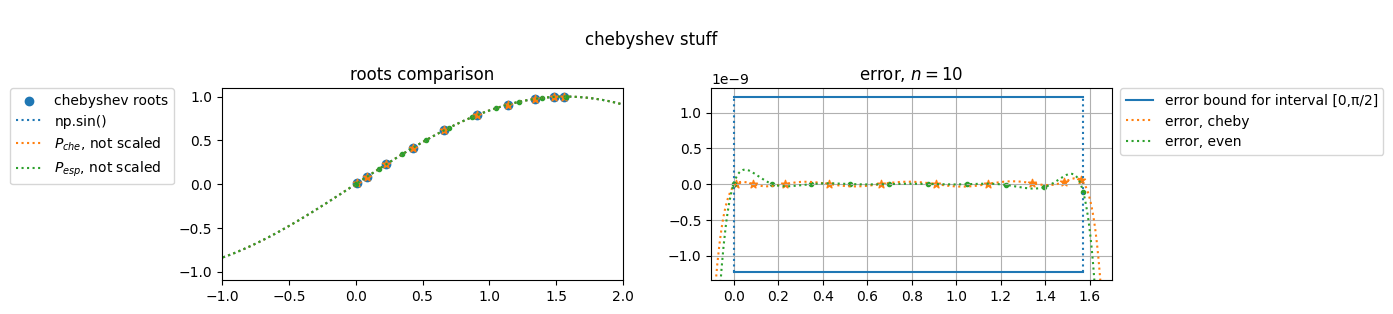


|   x (rad) |   np.sin() |     P,che |       error |
|-----------|------------|-----------|-------------|
|         1 |   0.841471 |  0.841471 | 3.32245e-11 |
|         2 |   0.909297 |  0.909297 | 1.39222e-13 |
|         3 |   0.14112  |  0.14112  | 3.09897e-11 |
|         4 |  -0.756802 | -0.756802 | 1.90662e-11 |
|        14 |   0.990607 |  0.990607 | 1.11141e-11 |
|      1000 |   0.82688  |  0.82688  | 2.70227e-11 | 



In [36]:
eg_12() # copy code from example 11 and set n = 10 ~ so difficult!

</br></br></br></br></br></br></br></br></br></br>
</br></br></br></br></br></br></br></br></br></br>

colab, alles ausdruken, bitte.